# Визуализация python

Виды графиков и решаемые проблемы

In [29]:
import sys
import datetime
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# для упрощения работы с данными добавим sql
from math import radians, cos, sin, asin, sqrt
from sklearn.linear_model import LinearRegression

sns.set(style="ticks")
%matplotlib inline

In [30]:
# Загрузим датасет с ресурса 
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
# для того чтобы использовалось меняьше оперативной памяти используем low memory
df = pd.read_csv(file_name, low_memory= True)
# прочтем хедер для общего понимания. итак. у нас есть 22 столбца
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Описание датасета

| Переменная    | Описание                                                                                                                 |
| ------------- | ------------------------------------------------------------------------------------------------------------------------ |
| id            | Нотация для дома                                                                                                         |
| date          | дата когда было продано                                                                                                    |
| price         | Цена - это цель прогноза                                                                                                 |
| bedrooms      | Количество спален                                                                                                        |
| bathrooms     | Количество ванных комнат                                                                                                 |
| sqft_living   | Квадратные метры дома                                                                                                    |
| sqft_lot      | Квадратные метры лота                                                                                                    |
| floors        | Общие полы (уровни) в доме                                                                                               |
| waterfront    | Дом, который имеет вид на набережную                                                                                     |
| view          | Был просмотрен                                                                                                           |
| condition     | Насколько хорошим состояние в целом                                                                                      |
| grade         | Общая оценка, предоставленная жилищному подразделению, на основе системы оценки округа Кинг                              |
| sqft_above    | Квадратные метры дома, кроме подвала                                                                                     |
| sqft_basement | Квадратные метры подвала                                                                                                 |
| yr_built      | Построен год                                                                                                             |
| yr_renovated  | Год, когда дом был отремонтирован                                                                                        |
| zipcode       | Zip code                                                                                                                 |
| lat           | Широта координата                                                                                                        |
| long          | Координата долготы                                                                                                       |
| sqft_living15 | Гостиная зона в 2015 году (подразумевает- некоторые ремонтные работы) Это могло или не могло повлиять на область участка |
| sqft_lot15    |Район лот размещения в 2015 году (подразумевает- некоторые ремонтные работы)                                              |


In [ ]:
# SQL statements

## Проанализирую типы данных. Найду пропущенные значения

In [31]:
# Просмотрм типы данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

In [32]:
# посмотрим пустые ячейки. в датасете они есть. ячейки исходя из информации числовые. необходимо заполнить данные
df.isnull().sum()

Unnamed: 0        0
id                0
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [33]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [34]:
# Заполним средним значением с помощью метода fillna().
# df['имя столбца с пропущенными значениями'] = df['имя столбца с пропущенными значениями'].заполнить(средними значениями столбца )
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mean())
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mean())

# ИЛИ взять медиану каждого столбца и воспользоваться библиотекой нумпай и функцией replace значений nan значением переменной mean
mean = df['bedrooms'].mean()
df['bedrooms'].replace(np.nan, mean, inplace = True)
# так же для второго столбцы
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

In [46]:
#Проверим остались ли пустые значения
print("Количество пустых ячеек в столбце bedrooms :", df['bedrooms'].isnull().sum())
print("Количество пустых ячеек в столбце  bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


## Базовый график plot() - строит линейный график. Отвечает на вопрос "Как меняется значение столбца со временем?"

**Синтаксис:**           
  
                        df.plot(x='Column1', y='Column2')

                        plt.show()

In [44]:
# просмотрим формат даты. мне он не очень подходит так как я хочу иметь только ГГГГММДД
df[['date']].head()

,date
0,20141013T000000
1,20141209T000000
2,20150225T000000
3,20141209T000000
4,20150218T000000


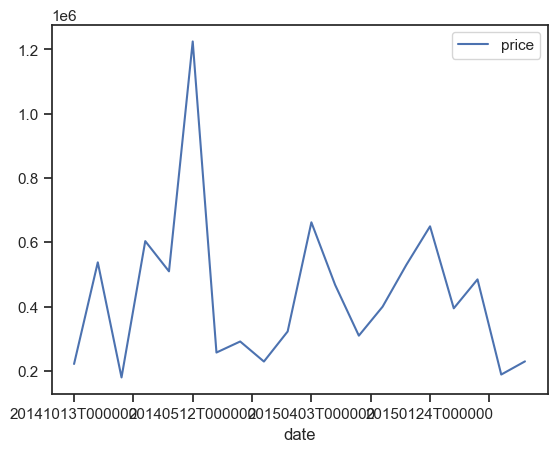

In [40]:
# будем работать с ячейками содержащими дату ( 2   date  object ) и ценой продажи
data = df.head(20)
data.plot(x ='date', y ='price')
# 
plt.show()

# Skatterplot


KeyError: "None of [Index(['P25th', 'Median', 'P75th'], dtype='object')] are in the [columns]"